In [20]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt





## Composition Consumption and Cost Calculation

To accurately calculate the composition consumption and its corresponding cost for a given grade of steel, we follow a two-step process. This approach first determines the actual amount of composition used in kilograms (kg) and then calculates the cost based on the price per ton.

### Step 1: Calculate Composition Consumption in Kilograms (kg)

Given variables:
- `C` = Composition consumption rate in kg of composition per ton of billets
- `T` = Tons of billets produced

The formula to calculate the actual consumption of the composition (`A`) in kilograms (kg) for that grade of steel is:

$$\[A = C \times T\]$$

### Step 2: Convert Consumption into Cost

Given additional variable:
$$ `P` = Price Composition per ton$$

Since the price `P` is provided per ton, and there are 1000 kg in a ton, we first convert the actual consumption from kilograms to tons (`A_tons`):

$$\[A_{\text{tons}} = \frac{A}{1000}\]$$

To calculate the total cost (`Cost`) of the composition based on its consumption and the sheet price per ton, we use the formula:

$$\[Cost = A_{\text{tons}} \times P\]$$

Combining the steps, we get the comprehensive formula for calculating cost:

$$\[Cost = \left( \frac{C \times T}{1000} \right) \times P\]$$

This formula allows us to calculate the total cost of the composition used based on its consumption rate per ton of billets produced, the total tons of billets produced, and the price per ton of the composition.
 
composition consumption in kg/ton * tons of billets produced = composition consumption in KG 
 1.   kg/ton * ton = kg you get the actual consumption of composition for that grade steel 
 2.   from 1, divide by 1000 to get ton, multiply the result by tth sheet price ton * (sheet price since its per ton) per composition.



## Prices for SMP2 Chemicals:

In [21]:


list_names_prices_smp1_december_2023 = {
    "FeSi - Ferro-Silicon":1562.52739907045,
    "FeSiMn - Silicon-maganese":986.290575415916,
    "FeMnHC - Ferro-Manganese (High Carbon)":1072.38676864388,
    "Recarburizer - Recarburizer":458.476134255355,
    'FeCr- ':0.0
}


list_names_prices_smp1_februrary_2024 = {
    "FeSi - Ferro-Silicon":1270.64396322791,
    "FeSiMn - Silicon-maganese":979.950501617602,
    "FeMnHC - Ferro-Manganese (High Carbon)":987.256404306629,
    "Recarburizer - Recarburizer":987.256404306629,
    'FeCr- ':0.0
}

list_names_prices_smp1_january_2024 = {
    "FeSi - Ferro-Silicon": 1321.21231855097 ,
    "FeSiMn - Silicon-maganese":980.828990060272,
    "FeMnHC - Ferro-Manganese (High Carbon)":1007.05074893469,
    "Recarburizer - Recarburizer":399.359191290486,
    'FeCr- ':0.0
}

list_names_prices_smp1_november_2023 = {
    "FeSi - Ferro-Silicon":1502.67462873706,
    "FeSiMn - Silicon-maganese":1082.79640299379,
    "FeMnHC - Ferro-Manganese (High Carbon)":1072.38799230385,
    "Recarburizer - Recarburizer":476.633106575964,
    'FeCr- ':0.0
}


# Convert dictionaries to a DataFrame
df = pd.DataFrame([
    list_names_prices_smp1_december_2023,
    list_names_prices_smp1_februrary_2024,
    list_names_prices_smp1_january_2024,
    list_names_prices_smp1_november_2023
])

mean_prices = df.mean()

list_names_prices_smp1_mean = mean_prices.to_dict()

list_names_prices_smp1_mean


{'FeSi - Ferro-Silicon': 1414.2645773965974,
 'FeSiMn - Silicon-maganese': 1007.4666175218949,
 'FeMnHC - Ferro-Manganese (High Carbon)': 1034.7704785472622,
 'Recarburizer - Recarburizer': 580.4312091071085,
 'FeCr- ': 0.0}

In [40]:

def plot_ferroalloys_comparison_modified(dataframe):

    long_df = dataframe.melt(id_vars="SteelGrade", var_name="Type", value_name="KG/Ton")

    plt.figure(figsize=(18, 10))
    sns.barplot(data=long_df, x="SteelGrade", y="KG/Ton", hue="Type")
    plt.title("SMP1- 2023 Ferroalloys Target vs Actual vs OverShot (KG/Ton) by Steel Grade", fontsize=22)
    plt.xticks(rotation=90, fontsize=14)
    plt.ylabel("KG/Ton", fontsize=24)
    plt.xlabel("Steel Grade", fontsize=24)
    plt.legend(title='', title_fontsize='18', labelspacing=0.95)
    plt.tight_layout()
    plt.show()


def add_suffix_to_duplicates(dataframe, column_name):

    df = dataframe.copy()
    df['counter'] = df.groupby(column_name).cumcount() + 1
    df[column_name] = df.apply(lambda row: f"{row[column_name]}_{row['counter']}", axis=1)
    df.drop('counter', axis=1, inplace=True)

    return df


def calculate_overshot_cost(dataframe, overshot_column_name, cost_per_ton):

    df = dataframe.copy()
    df["KG used " + overshot_column_name] = df[overshot_column_name] * df["Billet"]
    df["Tons used " + overshot_column_name] = df["KG used " + overshot_column_name] / 1000
    df[overshot_column_name + "  Cost"] = df["Tons used " + overshot_column_name ] * cost_per_ton
    return df



In [23]:

data = pd.read_csv("Ferroalloys Consumption SMP #1.csv")

# add filter here:
target_columns = [col for col in data.columns if 'target' in col.lower()]
data[target_columns] = data[target_columns] * 1.025



In [24]:


data['Ferroalloys Overshot (KG/Ton)'] = data['Ferroalloys Actual (KG/Ton)'] - data['Ferroalloys Target (KG/Ton)']
data['FeSiMn Overshot (KG/Ton)'] = data['FeSiMn Actual (KG/Ton)'] - data['FeSiMn Target (KG/Ton)']
data['FeSi Overshot (KG/Ton)'] = data['FeSi Actual (KG/Ton)'] - data['FeSi Target (KG/Ton)']


In [25]:

# filtered:
filtered_by_overshot = data[(data["Ferroalloys Overshot (KG/Ton)"] > 0.0) & (data["Ferroalloys Target (KG/Ton)"] != 0)].copy()
overall_ferroalloys =  filtered_by_overshot[["SteelGrade","Ferroalloys Target (KG/Ton)","Ferroalloys Actual (KG/Ton)","Ferroalloys Overshot (KG/Ton)"]]
overall_FeSiMn = filtered_by_overshot[["SteelGrade","FeSiMn Overshot (KG/Ton)", "FeSiMn Target (KG/Ton)","FeSiMn Actual (KG/Ton)","Billet"]]
overall_FeSi = filtered_by_overshot[["SteelGrade","FeSi Overshot (KG/Ton)","FeSi Target (KG/Ton)","FeSi Actual (KG/Ton)","Billet"]]


In [51]:


def plot_ferroalloys_comparison_modified(dataframe):
    # Melting the dataframe for easier plotting with seaborn
    long_df = dataframe.melt(id_vars="SteelGrade", var_name="Type", value_name="KG/Ton")
    
    plt.figure(figsize=(18, 10))
    sns.barplot(data=long_df, x="SteelGrade", y="KG/Ton", hue="Type")
    
    plt.title("SMP1- 2023 Ferroalloys Target vs Actual vs OverShot (KG/Ton) by Steel Grade", fontsize=25)
    plt.xticks(rotation=90, fontsize=14)
    plt.ylabel("KG/Ton", fontsize=24)
    plt.xlabel("Steel Grade", fontsize=24)
    
    # Making the legend bigger and placing it outside the plot
    plt.legend(title='', title_fontsize='22', labelspacing=0.95, fontsize='22', loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.tight_layout()
    plt.show()



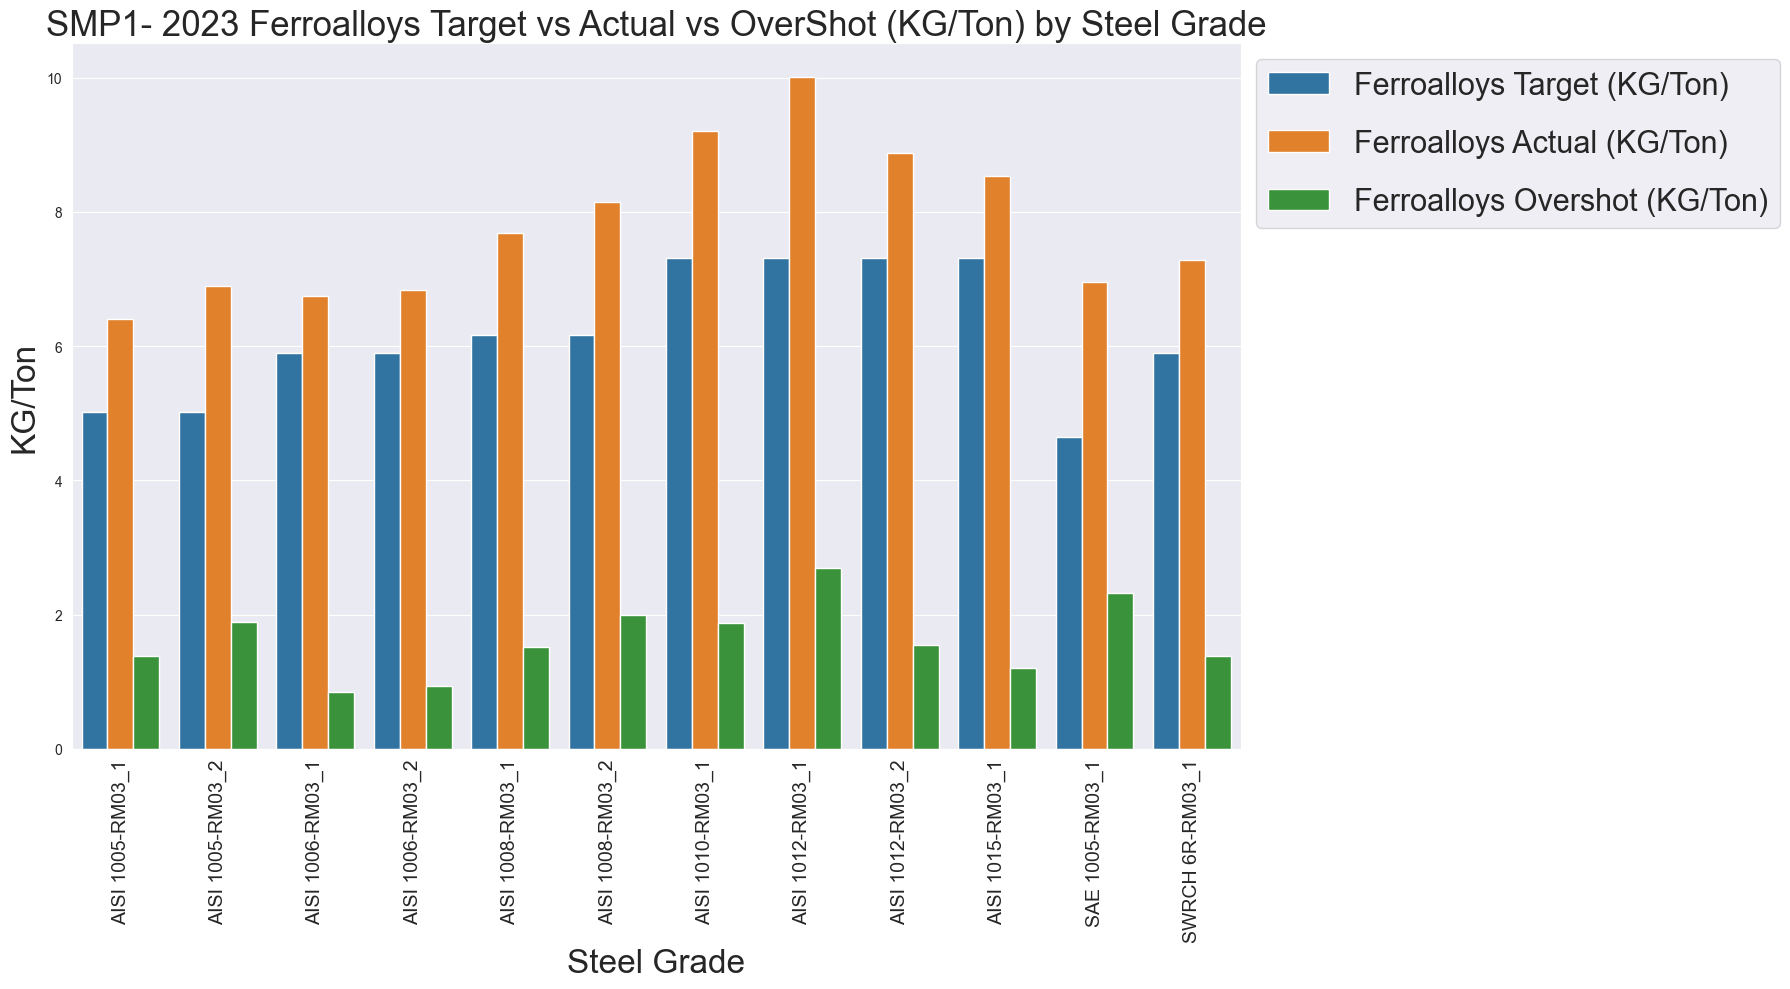

In [52]:

overall_ferroalloys_ = overall_ferroalloys.copy()
target_columns = [col for col in overall_ferroalloys_.columns if 'Target (KG/Ton)' in col]
mask = (overall_ferroalloys_[target_columns] != 0.0).any(axis=1)
overall_ferroalloys_ = overall_ferroalloys_.loc[mask]
overall_ferroalloys_ = add_suffix_to_duplicates(overall_ferroalloys_, 'SteelGrade')
plot_ferroalloys_comparison_modified(overall_ferroalloys_)



In [27]:

mean_cost_per_ton_FeSiMn = 1007.4666175218949
overall_FeSiMn_ = overall_FeSiMn.copy()
target_columns = [col for col in overall_FeSiMn_.columns if 'Target (KG/Ton)' in col]
mask = (overall_FeSiMn_[target_columns] != 0.0).any(axis=1)
overall_FeSiMn_ = overall_FeSiMn_.loc[mask]
overall_FeSiMn_ = add_suffix_to_duplicates(overall_FeSiMn_, 'SteelGrade')
overall_FeSiMn_["KG Used FeSiMn - Overshot"] = overall_FeSiMn_["FeSiMn Overshot (KG/Ton)"]  * overall_FeSiMn_["Billet"]
overall_FeSiMn_["Tons used FeSiMn - Overshot"] = overall_FeSiMn_["KG Used FeSiMn - Overshot"]/1000
overall_FeSiMn_["Overshot FeSiMn Cost"] = overall_FeSiMn_["Tons used FeSiMn - Overshot"] * mean_cost_per_ton_FeSiMn
# overall_FeSiMn_.drop(columns=['Billet','KG Used FeSiMn - Overshot','Tons used FeSiMn - Overshot'],axis=1,inplace=True)
overall_FeSiMn_


,SteelGrade,FeSiMn Overshot (KG/Ton),FeSiMn Target (KG/Ton),FeSiMn Actual (KG/Ton),Billet,KG Used FeSiMn - Overshot,Tons used FeSiMn - Overshot,Overshot FeSiMn Cost
6,AISI 1005-RM03_1,0.01675,4.64325,4.66,2998.133,50.218728,0.050219,50.593692
7,AISI 1005-RM03_2,0.57675,4.64325,5.22,13236.458,7634.127151,7.634127,7691.128259
8,AISI 1006-RM03_1,0.07325,5.19675,5.27,9652.346,707.034344,0.707034,712.313500
9,AISI 1006-RM03_2,-0.02675,5.19675,5.17,56329.480,-1506.813590,-1.506814,-1518.064391
10,AISI 1008-RM03_1,0.38650,5.88350,6.27,4932.591,1906.446421,1.906446,1920.681128
11,AISI 1008-RM03_2,0.34650,5.88350,6.23,61650.462,21361.885083,21.361885,21521.386108
12,AISI 1010-RM03_1,1.15425,5.56575,6.72,1386.720,1600.621560,1.600622,1612.572789
13,AISI 1012-RM03_1,2.46425,5.56575,8.03,340.998,840.304321,0.840304,846.578552
14,AISI 1012-RM03_2,1.89425,5.56575,7.46,7888.672,14943.116936,14.943117,15054.691475
15,AISI 1015-RM03_1,1.27425,5.56575,6.84,14620.995,18630.802879,18.630803,18769.911958


In [28]:

Chem ="FeSi"
mean_cost_per_ton_FeSi = 1414.2645773965974
overall_FeSi_ = overall_FeSi.copy()
target_columns = [col for col in overall_FeSi_.columns if 'Target (KG/Ton)' in col]
mask = (overall_FeSi_[target_columns] != 0.0).any(axis=1)
overall_FeSi_ = overall_FeSi_.loc[mask]
overall_FeSi_ = add_suffix_to_duplicates(overall_FeSi_, 'SteelGrade')
overall_FeSi_["KG Used FeSi - Overshot"] = overall_FeSi_["FeSi Overshot (KG/Ton)"]  * overall_FeSi_["Billet"]
overall_FeSi_["Tons used FeSi - Overshot"] = overall_FeSi_["KG Used FeSi - Overshot"]/1000
overall_FeSi_["Overshot FeSi Cost"] = overall_FeSi_["Tons used FeSi - Overshot"] * mean_cost_per_ton_FeSi
# overall_FeSi_.drop(columns=['Billet','KG Used FeSi - Overshot','Tons used FeSi - Overshot'],axis=1,inplace=True)
overall_FeSi_



,SteelGrade,FeSi Overshot (KG/Ton),FeSi Target (KG/Ton),FeSi Actual (KG/Ton),Billet,KG Used FeSi - Overshot,Tons used FeSi - Overshot,Overshot FeSi Cost
6,AISI 1005-RM03_1,0.86100,0.36900,1.23,2998.133,2581.392513,2.581393,3650.771991
7,AISI 1005-RM03_2,0.99100,0.36900,1.36,13236.458,13117.329878,13.117330,18551.374996
8,AISI 1006-RM03_1,0.53275,0.70725,1.24,9652.346,5142.287332,5.142287,7272.554820
9,AISI 1006-RM03_2,0.67275,0.70725,1.38,56329.480,37895.657670,37.895658,53594.486280
10,AISI 1008-RM03_1,0.72325,0.27675,1.00,4932.591,3567.496441,3.567496,5045.383846
11,AISI 1008-RM03_2,1.12325,0.27675,1.40,61650.462,69248.881441,69.248881,97936.240047
12,AISI 1010-RM03_1,-0.11275,1.75275,1.64,1386.720,-156.352680,-0.156353,-221.124057
13,AISI 1012-RM03_1,0.22725,1.75275,1.98,340.998,77.491796,0.077492,109.593901
14,AISI 1012-RM03_2,-0.61275,1.75275,1.14,7888.672,-4833.783768,-4.833784,-6836.249158
15,AISI 1015-RM03_1,-0.53275,1.75275,1.22,14620.995,-7789.335086,-7.789335,-11016.180694


In [29]:

# arrange the tables here and do manual calculation to get the right results:
overall_FeSiMn_ = overall_FeSiMn_.rename(columns={'Billet': 'Billet Mass (Tons)'})
overall_FeSiMn_ = overall_FeSiMn_.rename(columns={'Tons used FeSiMn - Overshot': 'FeSiMn - Overshot (Tons)'})
overall_FeSiMn_ = overall_FeSiMn_.rename(columns={'Overshot FeSiMn Cost': 'Overshot FeSiMn Cost ($USD)'})
overall_FeSiMn_ = overall_FeSiMn_.drop(columns=['KG Used FeSiMn - Overshot','FeSiMn Actual (KG/Ton)',"FeSiMn Target (KG/Ton)"],axis=1,errors="ignore")
overall_FeSiMn_ = overall_FeSiMn_[overall_FeSiMn_['Overshot FeSiMn Cost ($USD)'] >= 0]
overall_FeSiMn_


,SteelGrade,FeSiMn Overshot (KG/Ton),Billet Mass (Tons),FeSiMn - Overshot (Tons),Overshot FeSiMn Cost ($USD)
6,AISI 1005-RM03_1,0.01675,2998.133,0.050219,50.593692
7,AISI 1005-RM03_2,0.57675,13236.458,7.634127,7691.128259
8,AISI 1006-RM03_1,0.07325,9652.346,0.707034,712.313500
10,AISI 1008-RM03_1,0.38650,4932.591,1.906446,1920.681128
11,AISI 1008-RM03_2,0.34650,61650.462,21.361885,21521.386108
12,AISI 1010-RM03_1,1.15425,1386.720,1.600622,1612.572789
13,AISI 1012-RM03_1,2.46425,340.998,0.840304,846.578552
14,AISI 1012-RM03_2,1.89425,7888.672,14.943117,15054.691475
15,AISI 1015-RM03_1,1.27425,14620.995,18.630803,18769.911958
53,SAE 1005-RM03_1,0.75675,6602.877,4.996727,5034.035820


In [30]:

# arrange the tables here and do manual calculation to get the right results:
overall_FeSi_ = overall_FeSi_.rename(columns={'Billet': 'Billet Mass (Tons)'})
overall_FeSi_ = overall_FeSi_.rename(columns={'Tons used FeSi - Overshot': 'FeSi - Overshot (Tons)'})
overall_FeSi_ = overall_FeSi_.rename(columns={'Overshot FeSi Cost': 'Overshot FeSi Cost ($USD)'})
overall_FeSi_ = overall_FeSi_.drop(columns=['KG Used FeSi - Overshot','FeSi Actual (KG/Ton)',"FeSi Target (KG/Ton)"],axis=1,errors="ignore")
overall_FeSi_ = overall_FeSi_[overall_FeSi_['Overshot FeSi Cost ($USD)'] >= 0]
overall_FeSi_


,SteelGrade,FeSi Overshot (KG/Ton),Billet Mass (Tons),FeSi - Overshot (Tons),Overshot FeSi Cost ($USD)
6,AISI 1005-RM03_1,0.86100,2998.133,2.581393,3650.771991
7,AISI 1005-RM03_2,0.99100,13236.458,13.117330,18551.374996
8,AISI 1006-RM03_1,0.53275,9652.346,5.142287,7272.554820
9,AISI 1006-RM03_2,0.67275,56329.480,37.895658,53594.486280
10,AISI 1008-RM03_1,0.72325,4932.591,3.567496,5045.383846
11,AISI 1008-RM03_2,1.12325,61650.462,69.248881,97936.240047
13,AISI 1012-RM03_1,0.22725,340.998,0.077492,109.593901
60,SWRCH 6R-RM03_1,0.80275,3659.031,2.937287,4154.101149


In [31]:


final_results = pd.merge(overall_FeSiMn_, overall_FeSi_, on=['SteelGrade', 'Billet Mass (Tons)'],how="outer")
final_results["Ferroalloys Overshot (KG/Ton)"] = final_results["FeSiMn Overshot (KG/Ton)"] + final_results["FeSi Overshot (KG/Ton)"]
final_results["Ferroalloys Overshot (Tons)"] =  final_results["FeSiMn - Overshot (Tons)"] + final_results["FeSi - Overshot (Tons)"]
final_results["Ferroalloys Overshot Cost ($USD)"] = final_results["Overshot FeSiMn Cost ($USD)"] + final_results["Overshot FeSi Cost ($USD)"]
final_results


,SteelGrade,FeSiMn Overshot (KG/Ton),Billet Mass (Tons),FeSiMn - Overshot (Tons),Overshot FeSiMn Cost ($USD),FeSi Overshot (KG/Ton),FeSi - Overshot (Tons),Overshot FeSi Cost ($USD),Ferroalloys Overshot (KG/Ton),Ferroalloys Overshot (Tons),Ferroalloys Overshot Cost ($USD)
0,AISI 1005-RM03_1,0.01675,2998.133,0.050219,50.593692,0.86100,2.581393,3650.771991,0.87775,2.631611,3701.365683
1,AISI 1005-RM03_2,0.57675,13236.458,7.634127,7691.128259,0.99100,13.117330,18551.374996,1.56775,20.751457,26242.503256
2,AISI 1006-RM03_1,0.07325,9652.346,0.707034,712.313500,0.53275,5.142287,7272.554820,0.60600,5.849322,7984.868319
3,AISI 1006-RM03_2,NaN,56329.480,NaN,NaN,0.67275,37.895658,53594.486280,NaN,NaN,NaN
4,AISI 1008-RM03_1,0.38650,4932.591,1.906446,1920.681128,0.72325,3.567496,5045.383846,1.10975,5.473943,6966.064974
5,AISI 1008-RM03_2,0.34650,61650.462,21.361885,21521.386108,1.12325,69.248881,97936.240047,1.46975,90.610767,119457.626156
6,AISI 1010-RM03_1,1.15425,1386.720,1.600622,1612.572789,NaN,NaN,NaN,NaN,NaN,NaN
7,AISI 1012-RM03_1,2.46425,340.998,0.840304,846.578552,0.22725,0.077492,109.593901,2.69150,0.917796,956.172454
8,AISI 1012-RM03_2,1.89425,7888.672,14.943117,15054.691475,NaN,NaN,NaN,NaN,NaN,NaN
9,AISI 1015-RM03_1,1.27425,14620.995,18.630803,18769.911958,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:

final_results["Overshot FeSiMn Cost ($USD)"].sum()


74700.41455778235

In [33]:

final_results["Overshot FeSi Cost ($USD)"].sum()


190314.50703117106

In [34]:


final_results["Overshot FeSiMn Cost ($USD)"].sum() + final_results["Overshot FeSi Cost ($USD)"].sum()



265014.9215889534

In [35]:

# example calculation 1.64 /1000 * (14217) = overshot tons 
# overshot tons  * mean cost of 4 months of that chemicals:  1198.290427122754
# 23.31588 * 1198.290427122754





In [36]:

final_results.columns.to_list()



['SteelGrade',
 'FeSiMn Overshot (KG/Ton)',
 'Billet Mass (Tons)',
 'FeSiMn - Overshot (Tons)',
 'Overshot FeSiMn Cost ($USD)',
 'FeSi Overshot (KG/Ton)',
 'FeSi - Overshot (Tons)',
 'Overshot FeSi Cost ($USD)',
 'Ferroalloys Overshot (KG/Ton)',
 'Ferroalloys Overshot (Tons)',
 'Ferroalloys Overshot Cost ($USD)']

In [37]:


final_results["Ferroalloys Overshot (Tons)"].sum()


130.64768683600002

In [39]:

totals = final_results.select_dtypes(include=['number']).sum().rename('Total')
totals_df = pd.DataFrame(totals).transpose()
totals_df['SteelGrade'] = 'Total'
df_total = pd.concat([final_results, totals_df], ignore_index=True)
df_total.style.background_gradient()


,SteelGrade,FeSiMn Overshot (KG/Ton),Billet Mass (Tons),FeSiMn - Overshot (Tons),Overshot FeSiMn Cost ($USD),FeSi Overshot (KG/Ton),FeSi - Overshot (Tons),Overshot FeSi Cost ($USD),Ferroalloys Overshot (KG/Ton),Ferroalloys Overshot (Tons),Ferroalloys Overshot Cost ($USD)
0,AISI 1005-RM03_1,0.016750,2998.133000,0.050219,50.593692,0.861000,2.581393,3650.771991,0.877750,2.631611,3701.365683
1,AISI 1005-RM03_2,0.576750,13236.458000,7.634127,7691.128259,0.991000,13.117330,18551.374996,1.567750,20.751457,26242.503256
2,AISI 1006-RM03_1,0.073250,9652.346000,0.707034,712.313500,0.532750,5.142287,7272.554820,0.606000,5.849322,7984.868319
3,AISI 1006-RM03_2,nan,56329.480000,nan,nan,0.672750,37.895658,53594.486280,nan,nan,nan
4,AISI 1008-RM03_1,0.386500,4932.591000,1.906446,1920.681128,0.723250,3.567496,5045.383846,1.109750,5.473943,6966.064974
5,AISI 1008-RM03_2,0.346500,61650.462000,21.361885,21521.386108,1.123250,69.248881,97936.240047,1.469750,90.610767,119457.626156
6,AISI 1010-RM03_1,1.154250,1386.720000,1.600622,1612.572789,nan,nan,nan,nan,nan,nan
7,AISI 1012-RM03_1,2.464250,340.998000,0.840304,846.578552,0.227250,0.077492,109.593901,2.691500,0.917796,956.172454
8,AISI 1012-RM03_2,1.894250,7888.672000,14.943117,15054.691475,nan,nan,nan,nan,nan,nan
9,AISI 1015-RM03_1,1.274250,14620.995000,18.630803,18769.911958,nan,nan,nan,nan,nan,nan




SMP1 2023 Base estimates:
FeSiMn overshot Cost: 97621 USD 
FeSi Overshot Cost: 192998 USD 
Overshot Overall: 290620 USD
Ferroalloys Overshot tons: 189

SMP1 2023 Conservative estimates:
FeSiMn overshot Cost: 74700 USD
FeSi Overshot Cost: 190314 USD
Overshot Overall: 265014 USD
Ferroalloys Overshot tons: 130


